In [1]:
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%store -r energy_gains_benchmarks
%store -r time_gains_benchmarks

# Calculate the percentual difference for energy gains
energy_gains_benchmarks['Percentual Difference'] = (energy_gains_benchmarks[15] - energy_gains_benchmarks[-1]) / energy_gains_benchmarks[-1] * 100

# Calculate the percentual difference for time gains
time_gains_benchmarks['Percentual Difference'] = (time_gains_benchmarks[15] - time_gains_benchmarks[-1]) / time_gains_benchmarks[-1] * 100

# Now, keep only the percentual difference column for both datasets
energy_gains_benchmarks = energy_gains_benchmarks[['Percentual Difference']]
time_gains_benchmarks = time_gains_benchmarks[['Percentual Difference']]

# Optionally, rename columns for clarity
energy_gains_benchmarks.rename(columns={'Percentual Difference': 'Energy Difference (%)'}, inplace=True)
time_gains_benchmarks.rename(columns={'Percentual Difference': 'Time Difference (%)'}, inplace=True)


/tmp/ipykernel_6499/4010815132.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_gains_benchmarks.rename(columns={'Percentual Difference': 'Energy Difference (%)'}, inplace=True)
/tmp/ipykernel_6499/4010815132.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_gains_benchmarks.rename(columns={'Percentual Difference': 'Time Difference (%)'}, inplace=True)


In [3]:
%store -r energy_gains_clbg
%store -r time_gains_clbg

         Energy Gains CLBG (%)  Energy Gains Benchmarks (%)
Haskell             -27.296671                    -7.772024
Java                -13.150212                   -17.312118
Python              -17.991940                   -12.480833


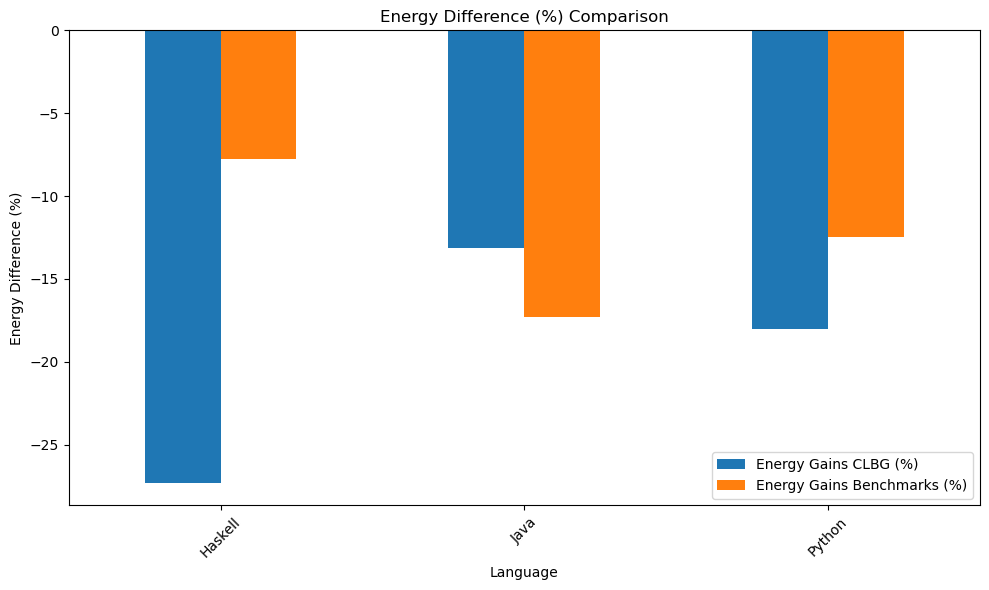

In [4]:
name_mapping = {
    'nofib (Haskell)': 'Haskell',
    'dacapo (Java)': 'Java',
    'pyperformance (Python)': 'Python'
}

# Rename the indices in energy_gains_benchmarks
energy_gains_benchmarks = energy_gains_benchmarks.rename(name_mapping)

# Combine them into a DataFrame
combined_df = pd.concat([energy_gains_clbg, energy_gains_benchmarks], axis=1)

# Optionally, set column names for clarity
combined_df.columns = ['Energy Gains CLBG (%)', 'Energy Gains Benchmarks (%)']

print(combined_df)
# Plotting
ax = combined_df.plot(kind='bar', figsize=(10, 6))
plt.title('Energy Difference (%) Comparison')
plt.xlabel('Language')
plt.ylabel('Energy Difference (%)')
plt.xticks(rotation=45)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

         Time Gains CLBG (%)  Time Gains Benchmarks (%)
Haskell            84.351948                  32.719613
Java              109.987418                  83.759853
Python            122.240756                  27.188295


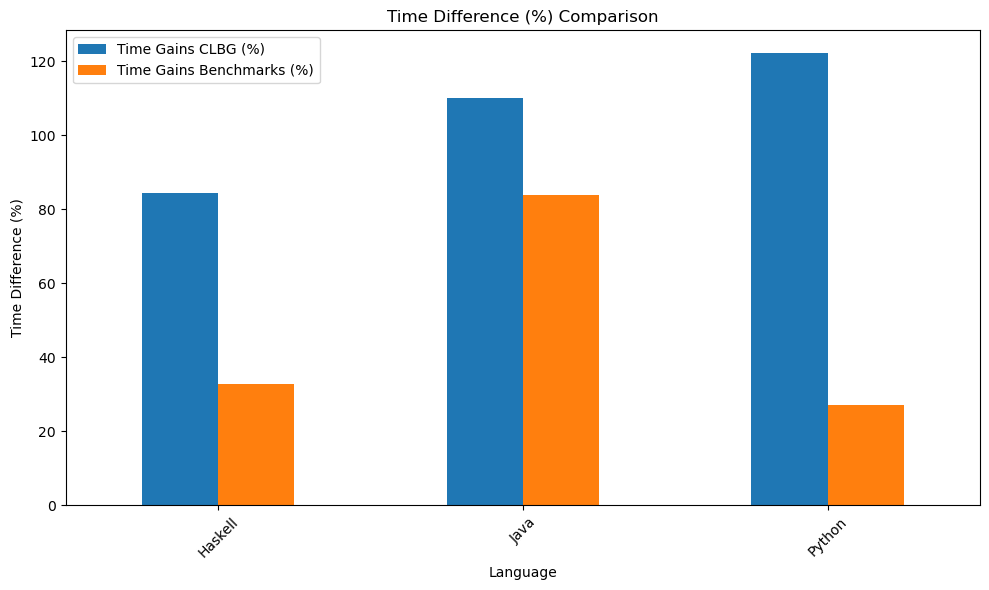

In [5]:
name_mapping = {
    'nofib (Haskell)': 'Haskell',
    'dacapo (Java)': 'Java',
    'pyperformance (Python)': 'Python'
}

# Rename the indices in time_gains_benchmarks
time_gains_benchmarks = time_gains_benchmarks.rename(name_mapping)

# Combine them into a DataFrame
combined_df = pd.concat([time_gains_clbg, time_gains_benchmarks], axis=1)

# Optionally, set column names for clarity
combined_df.columns = ['Time Gains CLBG (%)', 'Time Gains Benchmarks (%)']

print(combined_df)

# Plotting
ax = combined_df.plot(kind='bar', figsize=(10, 6))
plt.title('Time Difference (%) Comparison')
plt.xlabel('Language')
plt.ylabel('Time Difference (%)')
plt.xticks(rotation=45)
plt.legend(loc='best')

plt.tight_layout()
plt.show()